In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

## Análise

In [2]:
df_orders = pd.read_excel('dados/sample.xls', sheet_name='Orders')
df_returns = pd.read_excel('dados/sample.xls', sheet_name='Returns')

In [3]:
# Insere coluna "Returns" com left join
df_orders = df_orders.merge(df_returns, on='Order ID', how='left')

In [4]:
qtd_linhas = df_orders.shape[0]
print('Linhas:', qtd_linhas)
print('Colunas:', df_orders.shape[1])

Linhas: 9994
Colunas: 22


In [5]:
df_orders.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [6]:
df_orders.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Returned
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,NaN
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,NaN
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714,NaN


### Nulos por coluna

In [7]:
nulos = df_orders.isnull().sum()
vazio = df_orders.eq('').sum()
nulos_sql = df_orders.eq('NULL').sum()
zero = df_orders.eq(0).sum()
perc_zeros = round(zero / qtd_linhas, 2)
duplic = df_orders.duplicated().sum()
unicos = df_orders.nunique()
perc_unicos = round(unicos / qtd_linhas, 2)
dict = {'Nulos': nulos, 'String vazia': vazio, 'NULL': nulos_sql, 
        'Zeros': zero, 'Perc. zeros': perc_zeros, 'Duplicados': duplic, 
        'Valores únicos': unicos, 'Perc. únicos': perc_unicos}
df_nulos = pd.DataFrame(dict)
df_nulos

,Nulos,String vazia,NULL,Zeros,Perc. zeros,Duplicados,Valores únicos,Perc. únicos
Row ID,0,0,0,0,0.00,0,9994,1.00
Order ID,0,0,0,0,0.00,0,5009,0.50
Order Date,0,0,0,0,0.00,0,1237,0.12
Ship Date,0,0,0,0,0.00,0,1334,0.13
Ship Mode,0,0,0,0,0.00,0,4,0.00
Customer ID,0,0,0,0,0.00,0,793,0.08
Customer Name,0,0,0,0,0.00,0,793,0.08
Segment,0,0,0,0,0.00,0,3,0.00
Country,0,0,0,0,0.00,0,1,0.00
City,0,0,0,0,0.00,0,531,0.05


In [8]:
# Row id é 100% único e não tem nulos
df_orders.set_index('Row ID', inplace=True)

### Descrição das colunas

In [9]:
df_orders.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [10]:
df_orders.describe(include='object')

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Returned
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,800
unique,5009,4,793,793,3,1,531,49,4,1862,3,17,1850,1
top,CA-2017-100111,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,Yes
freq,14,5968,37,37,5191,9994,915,2001,3203,19,6026,1523,48,800


In [11]:
num_cols = df_orders.dtypes[df_orders.dtypes != 'object'].index.to_list()
cat_cols = df_orders.dtypes[df_orders.dtypes == 'object'].index.to_list()
print('Colunas numéricas:', num_cols)
print('Colunas numéricas:', cat_cols)

Colunas numéricas: ['Order Date', 'Ship Date', 'Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit']
Colunas numéricas: ['Order ID', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Returned']


### Formas de envio

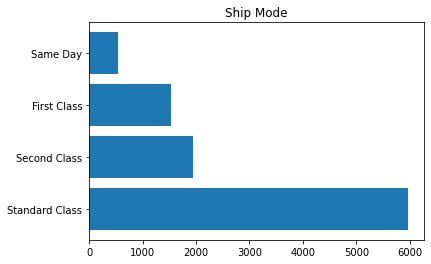

In [12]:
counts = df_orders['Ship Mode'].value_counts()
plt.figure()
plt.barh(counts.index, counts)
plt.title('Ship Mode')
plt.show()

### Segmentos

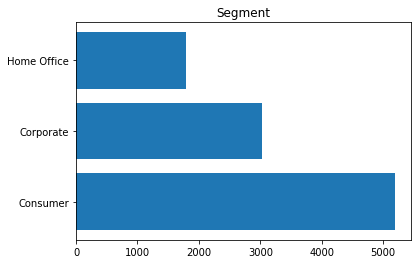

In [13]:
counts = df_orders['Segment'].value_counts()
plt.figure()
plt.barh(counts.index, counts)
plt.title('Segment')
plt.show()

### Paises

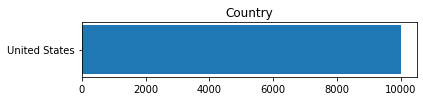

In [14]:
counts = df_orders['Country'].value_counts()
plt.figure(figsize=(6, 1))
plt.barh(counts.index, counts)
plt.title('Country')
plt.show()

### State

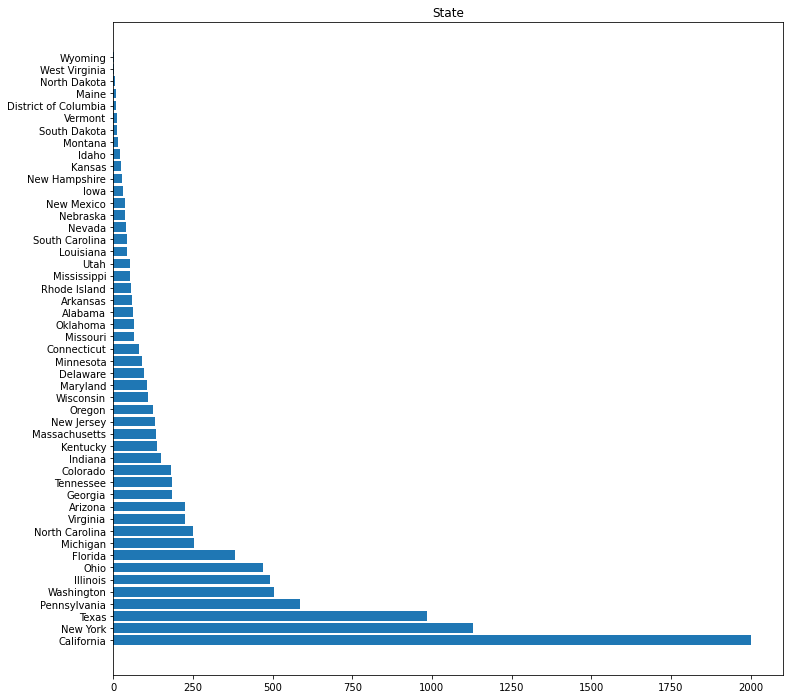

In [15]:
counts = df_orders['State'].value_counts()
plt.figure(figsize=(12, 12))
plt.barh(counts.index, counts)
plt.title('State')
plt.show()

### Região

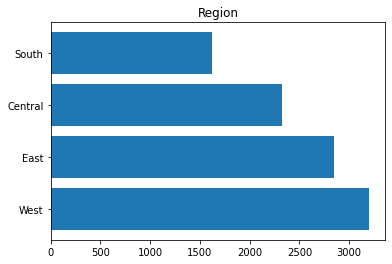

In [16]:
counts = df_orders['Region'].value_counts()
plt.figure()
plt.barh(counts.index, counts)
plt.title('Region')
plt.show()

### Categorias

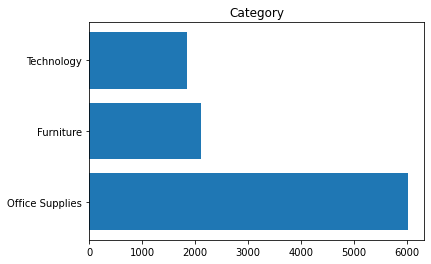

In [17]:
counts = df_orders['Category'].value_counts()
plt.figure()
plt.barh(counts.index, counts)
plt.title('Category')
plt.show()

### Sub-categorias

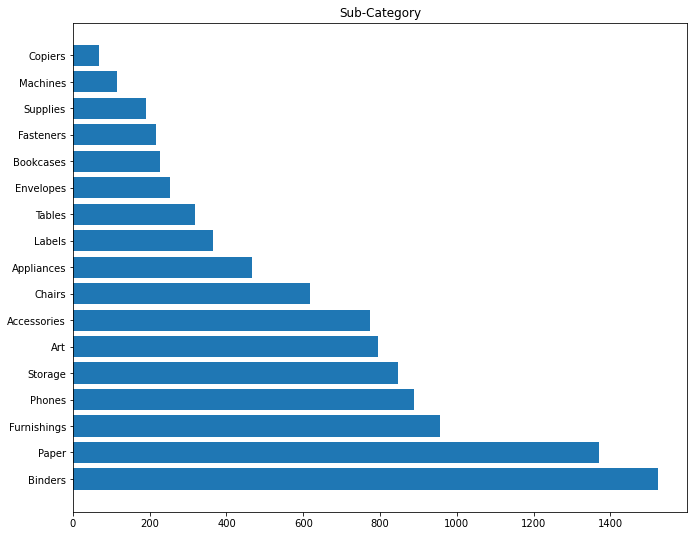

In [18]:
counts = df_orders['Sub-Category'].value_counts()
plt.figure(figsize=(11, 9))
plt.barh(counts.index, counts)
plt.title('Sub-Category')
plt.show()

### Vendas (sem outliers)

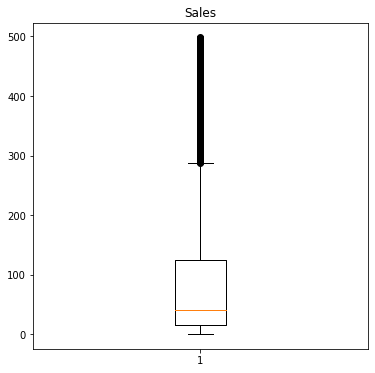

In [19]:
Q1, Q3 = df_orders['Sales'].quantile([0.25, 0.75])
IQR = Q3 - Q1    # Interquartile range. 
filter = (df_orders['Sales'] >= Q1 - 1.5 * IQR) & (df_orders['Sales'] <= Q3 + 1.5 *IQR)

fig = plt.figure(figsize=(6, 6))
plt.boxplot(df_orders['Sales'].loc[filter])
plt.title('Sales')
plt.show()

### Quantidade

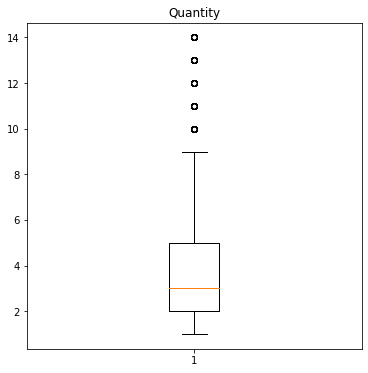

In [20]:
fig = plt.figure(figsize=(6, 6))
plt.boxplot(df_orders['Quantity'])
plt.title('Quantity')
plt.show()

### Desconto

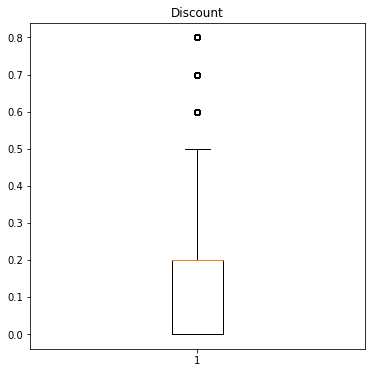

In [21]:
# Desconto percentual
fig = plt.figure(figsize=(6, 6))
plt.boxplot(df_orders['Discount'])
plt.title('Discount')
plt.show()

### Lucro (sem outliers)

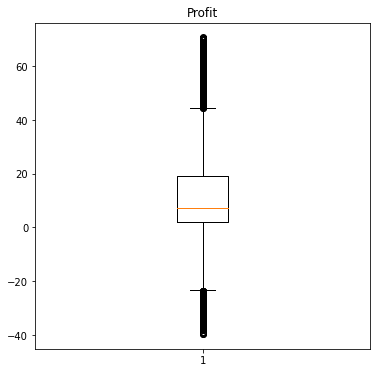

In [22]:
# Lucro absoluto (não percentual)
Q1, Q3 = df_orders['Profit'].quantile([0.25, 0.75])
IQR = Q3 - Q1    # Interquartile range. 
filter = (df_orders['Profit'] >= Q1 - 1.5 * IQR) & (df_orders['Profit'] <= Q3 + 1.5 *IQR)

fig = plt.figure(figsize=(6, 6))
plt.boxplot(df_orders['Profit'].loc[filter])
plt.title('Profit')
plt.show()

### Vendas por ano

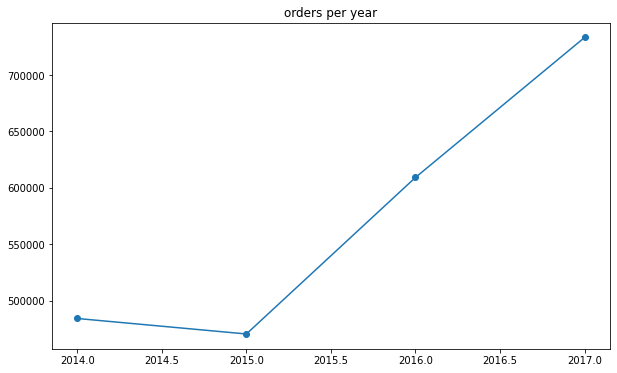

In [23]:
df_orders['Order Year'] = df_orders['Order Date'].dt.year
df_count = df_orders.groupby(['Order Year'])['Sales'].sum()
fig = plt.figure(figsize=(10, 6))
plt.plot(df_count.index, df_count.values, marker='o')
plt.title('orders per year')
plt.show()

### Devoluções

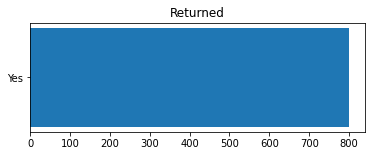

In [24]:
counts = df_orders['Returned'].value_counts()
plt.figure(figsize=(6, 2))
plt.barh(counts.index, counts)
plt.title('Returned')
plt.show()